In [1]:
import os
import csv
from collections import defaultdict

import numpy as np
import math

In [2]:
cwd = os.getcwd()
emission_path =  os.path.join(
    cwd, 
    "scenarios/data/highway_20191023-1757041571824624.5293925-emission.csv")
cr_path = os.path.join(
    cwd,
    "scenarios/cr/highway_20191023-2147261571838446.cr.xml"
)

In [3]:
def getData(filepath, columns=None):
    """Get data from csv file
    """
    data = defaultdict(list)
    with open(emission_path) as f:
        # if columns list is empty, print a list of all columns and return
        if not columns:
            reader = csv.reader(f)
            print('Columns are: ' + ', '.join(next(reader)))
            return data
            
        reader = csv.DictReader(f)
        for row in reader:
            for col in columns:
                if(col == "id"):
                    data[col].append(row[col])
                else:
                    data[col].append(float(row[col]))
        return data

In [4]:
columns = ["id", "time",  "x", "y", "angle", "speed"]
data = getData(emission_path, columns)

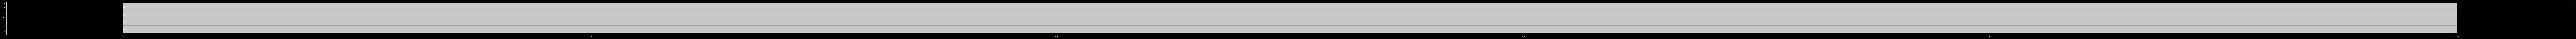

In [5]:
from scenarios.showScenario import draw_scenario

scenario, planning_problem_set = draw_scenario(cr_path)

In [6]:
from lxml import etree, objectify

from commonroad.common.util import Interval
from commonroad.geometry.shape import Rectangle, Circle, Polygon, ShapeGroup
from commonroad.planning.planning_problem import PlanningProblemSet, PlanningProblem
from commonroad.prediction.prediction import SetBasedPrediction, TrajectoryPrediction
from commonroad.scenario.lanelet import Lanelet, LineMarking
from commonroad.scenario.obstacle import (
    ObstacleRole,
    ObstacleType,
    DynamicObstacle,
    StaticObstacle,
    Obstacle,
    Occupancy,
    Shape,
)
from commonroad.scenario.scenario import Scenario
from commonroad.scenario.trajectory import Trajectory, State

In [7]:
import pandas as pd

df = pd.read_csv(emission_path, usecols=columns)
df.sort_values(by=["id", "time"])

,time,y,id,x,angle,speed
0,11.4,-11.2,flow_00.0,5.10,90.0,20.00
1,11.5,-11.2,flow_00.0,7.08,90.0,19.77
2,11.6,-11.2,flow_00.0,9.03,90.0,19.55
3,11.7,-11.2,flow_00.0,10.97,90.0,19.34
4,11.8,-11.2,flow_00.0,12.88,90.0,19.15
5,11.9,-11.2,flow_00.0,14.78,90.0,18.97
6,12.0,-11.2,flow_00.0,16.66,90.0,18.80
7,12.1,-11.2,flow_00.0,18.52,90.0,18.65
8,12.2,-11.2,flow_00.0,20.37,90.0,18.50
9,12.3,-11.2,flow_00.0,22.21,90.0,18.36


In [8]:
row = df.iloc[0]
carshape = Rectangle(length=4.0, width=2.0)
state = State(
        position=np.array(row[["x", "y"]]), 
        orientation=math.radians(row["speed"]), 
        velocity=row["speed"], 
        time_step=int(row["time"] * 10)
        )
last_id = row["id"]
id_list = []
state_list = [state]

for i in range(1, df.shape[0]):
    row = df.iloc[i]
    id = row["id"]
    state = State(
        position=np.array(row[["x", "y"]]), 
        orientation=math.radians(row["speed"]), 
        velocity=row["speed"], 
        time_step=int(row["time"] * 10)
        )
    if id != last_id:
        id_list.append(id)
        scenario.add_objects(
            DynamicObstacle(
                obstacle_id=scenario.generate_object_id(),
                obstacle_type=ObstacleType.CAR,
                obstacle_shape=carshape,
                initial_state=state_list[0],
                prediction=TrajectoryPrediction(
                    trajectory=Trajectory(
                        initial_time_step = state_list[0].time_step,
                        state_list = state_list
                    ),
                    shape=carshape
                )
            )
        )
        state_list=[]
        last_id = id
    state_list.append(state)
    if i % 1000 == 0:
        print(i)
    

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000


In [9]:
scenario.static_obstacles

[]

In [10]:
len(scenario.dynamic_obstacles)

79

In [11]:
from commonroad.common.file_writer import CommonRoadFileWriter
from commonroad.common.file_writer import OverwriteExistingFile

fw = CommonRoadFileWriter(scenario, planning_problem_set, "Rong", "SJTU", "SUMO", "highway")
filename = os.path.join(
    cwd,
    "scenarios/cr/highway.cr.xml"
)
fw.write_to_file(filename, OverwriteExistingFile.ALWAYS)

Replace file /home/rong/VAE-Motion-Planning/scenarios/cr/highway.cr.xml


In [13]:
df.shape[0]

186660